In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:

# Get the list of S&P 500 constituents
tickers = pd.read_excel(
    "https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx",
    header=4).Ticker.dropna().to_list()

# Retrieve historical data
df = yf.download(tickers, period='10y')
sp500 = df['Adj Close'].dropna(how='all', axis=1)


[*********************100%%**********************]  504 of 504 completed


3 Failed downloads:
['BRK.B', '-']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=10y)')


In [3]:
sp500.tail(1) #Adjusted Close

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-18 00:00:00,137.880005,14.175,196.460007,153.839996,147.375,108.300003,74.82,341.720001,599.799988,196.850006,...,89.139999,62.459999,102.587799,34.060001,110.415001,130.5,118.93,269.079987,43.290001,195.985001


In [4]:
# Define the time period and lag
time_period = 1260  # 5 years
lag = 20

# Calculate the rolling mean price
rolling_mean_price = sp500.rolling(window=time_period - 252).mean().dropna(how='all')
lagged_closed_price = sp500[-20 -time_period: -20] #shifts the df by 20 days
# Can also use .shift(20) to shift the df by 20 days instead of slicing

In [5]:
lagged_closed_price[::39*5].pct_change().dropna(how='all')
# Testing the lagged price for 39 weeks (1 quarter) and 5 years
# The pct_change() calculates the percentage change between the current and a prior element.
# The slice [::39*5] is used to select every 39th row (weekly) and every 5th column (yearly)

/var/folders/8n/frf4cdjd6k134p3nvgp4kf6c0000gn/T/ipykernel_4634/170118145.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  lagged_closed_price[::39*5].pct_change().dropna(how='all')


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-28 00:00:00,0.087932,-0.324115,0.086639,-0.236738,NaN,0.205641,0.389399,0.221431,0.175787,0.222141,...,0.021124,0.272796,-0.103768,0.406571,0.074896,0.339068,0.204197,0.133866,-0.154896,0.381602
2020-06-08 00:00:00,0.299773,-0.192612,0.635588,0.494120,NaN,0.112785,-0.093337,0.087021,0.409917,0.168953,...,0.050411,0.066842,-0.153589,-0.004191,-0.026264,-0.167734,0.001152,0.365769,0.039971,0.128368
2021-03-17 00:00:00,0.364496,0.238799,0.504080,0.152663,NaN,0.285085,0.054698,0.264610,0.133818,0.263520,...,0.286765,-0.038078,0.151897,0.249193,0.456463,0.173057,0.182407,0.708222,0.434129,0.109889
2021-12-22 00:00:00,0.284857,-0.274245,0.414388,0.302209,-0.159267,0.195138,0.151596,0.541181,0.250482,0.131389,...,-0.386643,0.086280,0.072246,-0.138982,0.120406,0.227110,-0.219400,0.226399,0.110451,0.552957
2022-10-03 00:00:00,-0.188740,-0.347207,-0.185610,0.077330,-0.379763,-0.275381,0.069977,-0.337821,-0.494237,-0.145496,...,-0.247584,0.002650,0.554407,-0.456917,-0.215478,-0.177747,-0.106381,-0.531227,-0.139767,-0.370215
2023-07-14 00:00:00,-0.047687,0.521812,0.344771,0.023191,0.365143,0.105302,0.661990,0.211380,0.804901,0.341211,...,0.698790,0.003547,0.125167,0.417927,0.224495,0.259706,0.333860,0.136683,-0.392061,0.145245


In [6]:

# Function to calculate momentum factors
def calculate_momentum_factors(tickers, time_period):

    # Calculate the 52-week trend
    slope_info = pd.DataFrame(index=sp500.columns)
    for i in range(1, lag + 1): 
        slope_info[i] = rolling_mean_price.apply(lambda x: np.polyfit(np.arange(len(x[-i - 252: -i])), x[-i - 252: -i], 1)[0] if x[-i - 252: -i].notna().all() else np.nan) 
    
    _52_week_trend = slope_info.mean(axis=1) 


    # Percent above 260 day Low
    percent_above_260 = (lagged_closed_price - lagged_closed_price.rolling(window=260).min()) / lagged_closed_price.rolling(window=260).min() * 100
    percent_above_260 = percent_above_260.dropna(how='all').mean()

    # Oscillator calculations
    oscillator = (lagged_closed_price.rolling(window=4*5).mean() - lagged_closed_price.rolling(window=52*5).mean()) / lagged_closed_price.rolling(window=52*5).mean() * 100
    oscillator = oscillator.dropna(how='all').mean()    

    # 39 week returns
    
    returns_39w = lagged_closed_price.pct_change(periods= 39 * 5).dropna(how='all').mean() 
    

    # 51 week Volume Price Trend
    volume = df['Volume'].dropna(how='all', axis=1)[-20 - time_period: -20]
    vpt = (volume * lagged_closed_price.pct_change()).cumsum() # volume price trend is the cumulative sum of volume * pct_change 
    vpt_51w = (vpt - vpt.shift(periods=51 * 5)).dropna(how='all').mean()
    # the shift is used to shift the df by 51 weeks so that we can calculate the difference between the current and prior 51 week period 
    

    # Creating the DataFrame
    new_table = pd.DataFrame(index=sp500.transpose().index)
    new_table['Slope 52 Week Trend-Line'] = _52_week_trend
    new_table['Percent above 260 Day Low'] = percent_above_260
    new_table['4/52 Week Oscillator'] = oscillator
    new_table['39_Week_Return'] = returns_39w
    new_table['51 Week Volume Price Trend'] = vpt_51w
    return new_table



In [7]:
momentum_factors = calculate_momentum_factors(tickers, time_period)
momentum_factors



,Slope 52 Week Trend-Line,Percent above 260 Day Low,4/52 Week Oscillator,39_Week_Return,51 Week Volume Price Trend
A,0.055382,38.316083,7.033382,0.135778,5.888175e+04
AAL,-0.015955,44.102476,-6.971433,-0.051336,9.198930e+07
AAPL,0.122199,60.517772,15.888574,0.315529,3.202919e+07
ABBV,0.082613,40.378221,10.688476,0.175842,-1.392343e+06
ABNB,NaN,32.584615,-6.145988,-0.048079,1.297341e+06
...,...,...,...,...,...
YUM,0.032889,36.494585,3.349908,0.080100,3.875875e+04
ZBH,0.010656,34.906580,0.571083,0.041145,-5.231855e+04
ZBRA,0.076960,57.846194,4.803177,0.149265,-1.075765e+05
ZION,-0.005546,52.649747,-0.752179,0.031972,-1.383253e+06


In [8]:
z_scores = (momentum_factors - momentum_factors.mean()) / momentum_factors.std()
z_scores = z_scores.sum(axis=1) # summing the z-scores of each factor to get the total z-score per asset
# The z-score is the number of standard deviations away from the mean a data point is.


In [9]:
z_scores.sort_values(ascending=False, inplace= True) #sorts the z-scores in descending order
long_basket= z_scores[:10] #selects the top 10 z-scores
short_basket = z_scores[-10:] #selects the bottom 10 z-scores

print("Long Basket:")
print (long_basket)
print("Short Basket:") 
print(short_basket)


Long Basket:
TSLA    41.859637
MRNA    20.293992
ENPH    18.783134
NVDA    16.495590
NVR     15.457075
BLDR     9.803449
AZO      9.765328
CMG      9.559056
AMD      9.453705
FCX      8.320996
dtype: float64
Short Basket:
VZ     -5.241791
BXP    -5.328307
INTC   -5.370866
WBA    -5.371568
PARA   -5.374339
WBD    -5.813340
BAX    -5.994548
FIS    -6.189001
VTRS   -6.412391
VFC    -7.560049
dtype: float64


In [10]:
#Back-Test period of time_period year (20 Day Lag)

# Get the lagged closing prices for the long and short baskets
long_lagged_closed_price = lagged_closed_price[long_basket.index]
short_lagged_closed_price = lagged_closed_price[short_basket.index]


def calculate_cumulative_returns(dataf): 
    returns = dataf.pct_change()
    cumulative_returns = (1 + returns).cumprod().mean(axis=1) 
    return cumulative_returns

# Calculate the cumulative returns for the SP500, long basket, and short basket
cumulative_returns = calculate_cumulative_returns(lagged_closed_price)
long_cumulative_returns = calculate_cumulative_returns(long_lagged_closed_price)
short_cumulative_returns = calculate_cumulative_returns(short_lagged_closed_price)








## Cumulative Returns

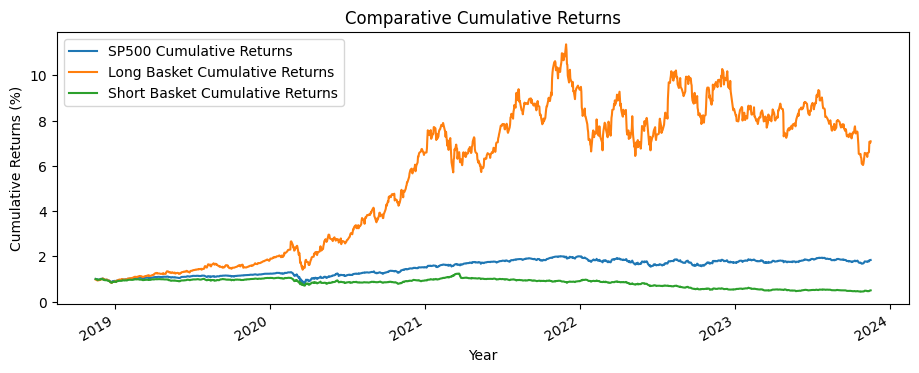

In [11]:
plt.figure(figsize=(11,4))
cumulative_returns.plot(label='SP500 Cumulative Returns')
long_cumulative_returns.plot(label='Long Basket Cumulative Returns')
short_cumulative_returns.plot(label='Short Basket Cumulative Returns')

plt.legend()
plt.title('Comparative Cumulative Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns (%)')
plt.show()

In [12]:
long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')

Date
2018-12-17   -0.068959
2018-12-18   -0.048544
2018-12-19   -0.050196
2018-12-20   -0.055952
2018-12-21   -0.090692
                ...   
2023-11-13   -0.036008
2023-11-14    0.014168
2023-11-15    0.039984
2023-11-16    0.066980
2023-11-17    0.103991
Length: 1240, dtype: float64

In [13]:
#Back-Test period of time_period year (20 Day Lag)

# Get the lagged closing prices for the long and short baskets
long_lagged_closed_price = lagged_closed_price[long_basket.index]
short_lagged_closed_price = lagged_closed_price[short_basket.index]


def calculate_cumulative_returns(dataf): 
    returns = dataf.pct_change()
    cumulative_returns = (1 + returns).cumprod().mean(axis=1) 
    return cumulative_returns

# Calculate the cumulative returns for the SP500, long basket, and short basket
cumulative_returns = calculate_cumulative_returns(lagged_closed_price)
long_cumulative_returns = calculate_cumulative_returns(long_lagged_closed_price)
short_cumulative_returns = calculate_cumulative_returns(short_lagged_closed_price)








## Monthly Long basket return bar chart (pos/neg coloring) vs SP500

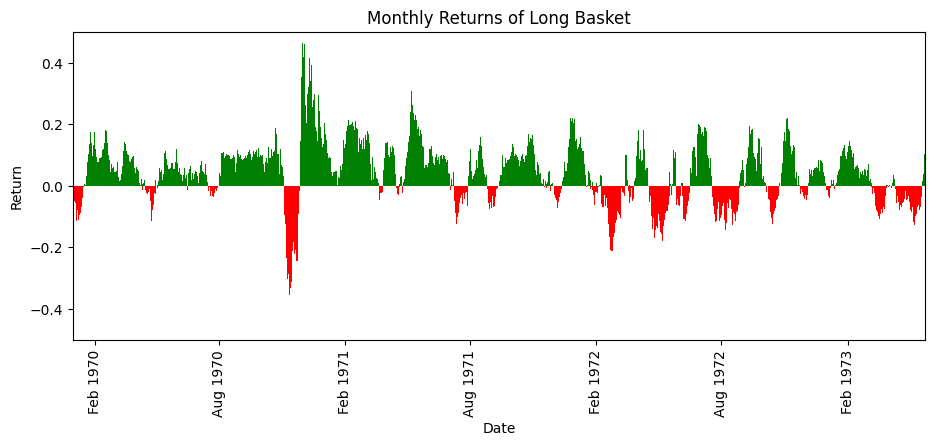

In [14]:

# Calculate 20-day returns, take the mean, drop NaNs, and plot
long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(
    kind='bar', 
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Date format messes up when using the bar plot
plt.ylim(-0.5, 0.5)
plt.ylabel('Return')
plt.title('Monthly Returns of Long Basket')
plt.show()

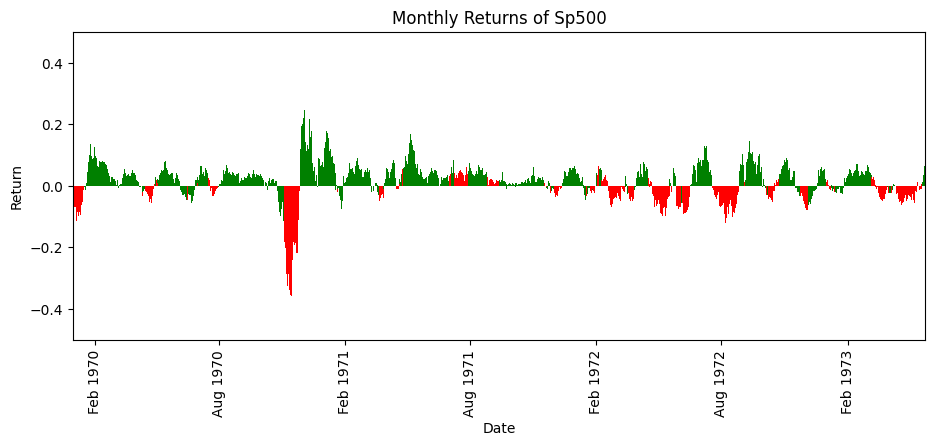

In [15]:

# Calculate 20-day returns, take the mean, drop NaNs, and plot
lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(
    kind='bar', 
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.ylabel('Return')
plt.ylim(-0.5, 0.5)
plt.title('Monthly Returns of Sp500')
plt.show()

## Monthly return for long picks vs short picks vs SP500

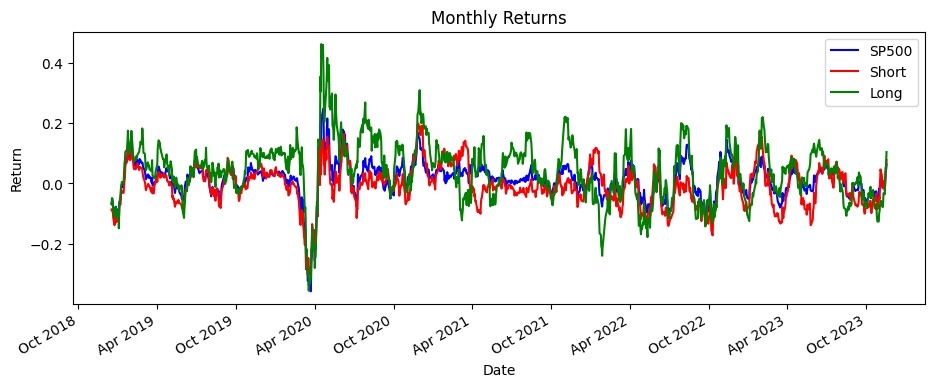

In [16]:
# monthly returns 
monthly_graph = pd.DataFrame()
lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4), label = 'SP500', color ='blue')
short_lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4),label= 'Short', color = 'red')
long_lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4), label = 'Long', color = 'green')
plt.legend()
plt.ylabel('Return')
# Set x-ticks to be months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title('Monthly Returns')
plt.show()


